# Spotify's Data Problem

### Authors:
Quinn Dizon  
Alan Gayahan

### Summary: 

Spotify collects data about all the tracks on its platform. These are features that quantify some aspect of the music, such as _tempo_, _danceability_, and overall positiveness (_valence_), as well as categorical features like _genre_. Spotify provides easy access to this data through its API.  

While the data appears to be clean, scaled, and ready for predictive analysis (linear regression, logistic regression, time series analysis), we find that the metrics provided by Spotify do not lend themselves to this approach. Our analysis discusses some reasons why we believe this is the case, and some alternative methods that may yield better results for this data.  

### Data:
* [Kaggle Spotify Dataset](https://www.kaggle.com/grasslover/spotify-music-genre-list)
* [Spotify API](https://developer.spotify.com/documentation/web-api/) (for supplemental time series information)

***
## Table of Contents


## Data Example
Below is an example from our finalized dataset.

In [9]:
import pandas as pd
pd.options.display.max_columns = 999

In [10]:
data = pd.read_csv("../data/processed/FINAL.zip")
data.head()

,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre,Expanded_genre,artist_names,artist_ids,release_date,release_date_precision,Super_genre
0,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,audio_features,6J2VvzKwWc2f0JP5RQVZjq,spotify:track:6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/tracks/6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/audio-analysis/6J2VvzKwWc2f0JP5RQVZjq,282920.0,4.0,celticmetal,celtic metal,The HU,0b2B3PwcYzQAhuJacmcYgc,2018-10-14,day,metal
1,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,audio_features,4HA34COgxgVJ6zK88UN4Ik,spotify:track:4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/tracks/4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/audio-analysis/4HA34COgxgVJ6zK88UN4Ik,300320.0,4.0,celticmetal,celtic metal,Gloryhammer,7dkEByOe0oHqc54qU4hwzV,2019-04-12,day,metal
2,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,audio_features,3W6Xik6Xxf06JuUoZSATlD,spotify:track:3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/tracks/3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/audio-analysis/3W6Xik6Xxf06JuUoZSATlD,175353.0,4.0,celticmetal,celtic metal,"Orion's Reign,Minniva","3hRL14TJtJqr7i1IH3D1pU,50KIyycosYOGrBHfLaI1Ju",2018-10-05,day,metal
3,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,audio_features,2gGveBaLJQMtJ43X4UL5kH,spotify:track:2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/tracks/2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/audio-analysis/2gGveBaLJQMtJ43X4UL5kH,272292.0,4.0,celticmetal,celtic metal,Brothers of Metal,0WPCPYm5IDNtQjuJOGNPcy,2018-11-09,day,metal
4,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,audio_features,1lRF81A1C9QoCgBcEop2zg,spotify:track:1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/tracks/1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/audio-analysis/1lRF81A1C9QoCgBcEop2zg,237933.0,4.0,celticmetal,celtic metal,Powerwolf,5HFkc3t0HYETL4JeEbDB1v,2018-07-13,day,metal


A detail data dictionary can be found directly in [Spotify's Api](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/).

## Time Series Analysis: 
### Number of tracks released in each month/year 

We began our time series analysis by looking at the release rate of tracks from 1970 to present day. 

In our initial exploration, we resampled our data by month, and produced the following graph. 

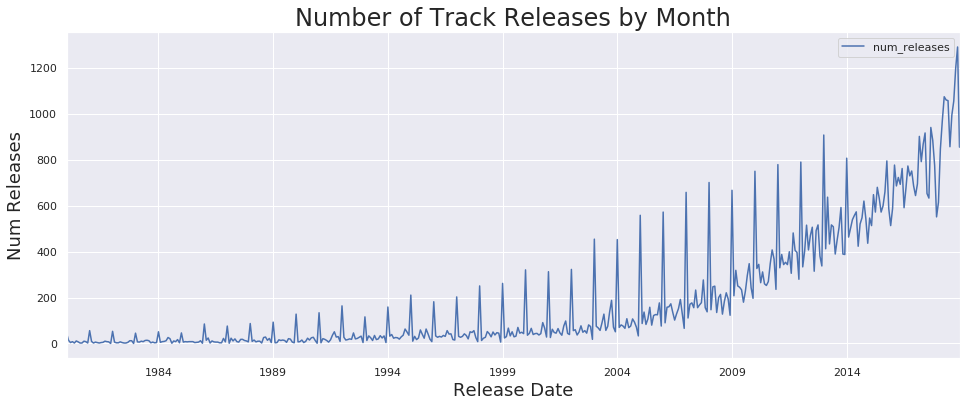

Although this appears to show strong seasonality, further exploration for the day revealed that _xxxx-01-01_ was used as a placeholder for tracks that had a known release year, but unknown date. The large spikes in the graph shown above all occur on the first of January for each year.   

Because of this, we believe this graph is an unreliable representation of actual release dates. 

To adjust, we resampled our data by year to produce the following graph. 

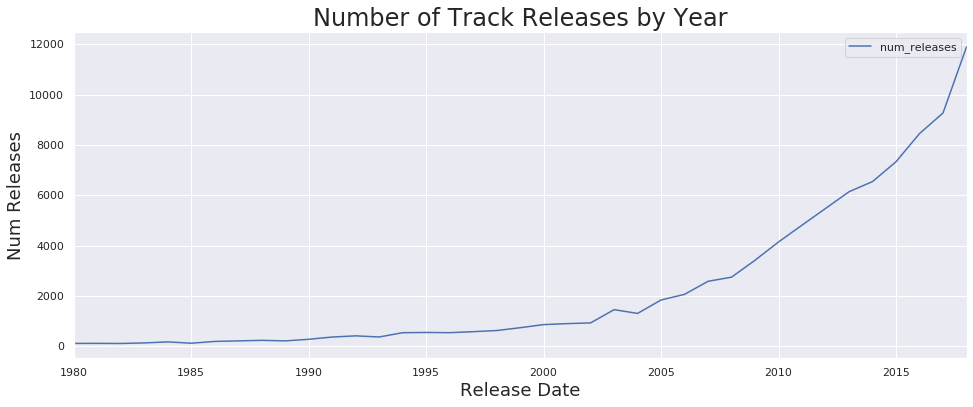

Although no seasonality can be seen in this large scale view, there is a clear and significant upwards trend beginning ca. 2000.  

We believe this sharp increase in tracks released per year has to do with the digital revolution. Advancements in recording and music making technology, as well as decreased costs for basic hardware, have made it so a large number of amateur musicians can quickly and easily produce high quality tracks ready for digital release.   

_The code for the graphs above can be found in /exploration/qd_072819_timeseries_release_date.ipynb_

### Time series analysis of features

Still analyzing our time series data, we plotted the behavior of each numeric feature over time. A sample of our findings is displayed below. 

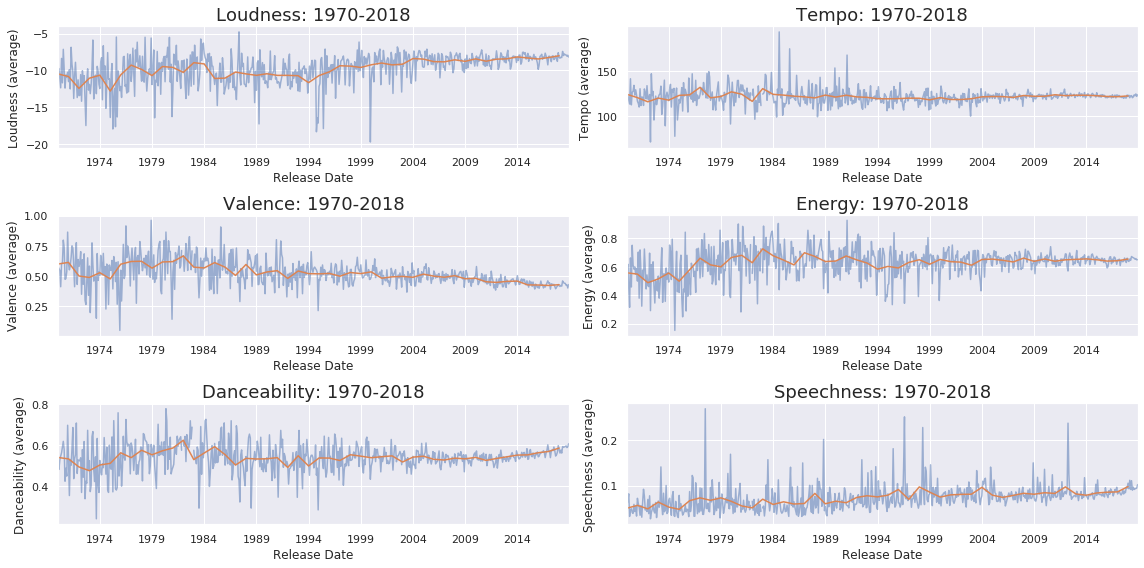

As can be seen in the charts above, there is a clear trend for each feature from a state of relatively high variance to a state of relatively little variance. We refer to this as _feature convergence_, as it appears that, over time, these musical features become more and more standardized across all released tracks.  

While only a small part of the overall picture, the feature convergence shown here is a good indicator of why these features are losing predictive power over time.

_The code for the graphs above can be found in exploration/qd_072719_time_series_exploration.ipynb_

## Linear Regression

### Predicting feature values based on other features

In preparing for a linear regression analysis, we produced the following parirwise graph to see which features have the best correlation and predictive power for other features. 

